# Step 1 : Reading the data RECS dataset and associated layout file.


In [250]:
# importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [251]:
# Reading dataseet and layout file using pandas module
# "DOEID" column in unique identifier so we will use that as index for the data frame
df = pd.read_csv("recs2009_public.csv",index_col="DOEID")
layout_df = pd.read_csv("public_layout.csv")

/home/mmzaveri/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [252]:
df.shape

(12083, 939)

In [253]:
df.head()

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,...,SCALEKER,IECC_Climate_Pub,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
DOEID,,,,,,,,,,,,,,,,,,,,,
1,2,4,12,2,2471.68,4742,1080,4953,1271,4,...,-2,4A,2117,56,4250,0.48,6,56,9,96
2,4,10,26,2,8599.17,2662,199,2688,143,5,...,-2,3C,62,26,2393,0.61,0,64,38,73
3,1,1,1,5,8969.92,6233,505,5741,829,1,...,-2,5A,2346,49,5654,0.48,3,52,12,88
4,2,3,7,2,18003.64,6034,672,5781,868,1,...,-2,5A,2746,0,4941,0.55,4,55,7,87
5,1,1,1,3,5999.61,5388,702,5313,797,1,...,-2,5A,2251,0,5426,0.61,4,50,13,90


In [254]:
df.describe()

,REGIONC,DIVISION,REPORTABLE_DOMAIN,TYPEHUQ,NWEIGHT,HDD65,CDD65,HDD30YR,CDD30YR,Climate_Region_Pub,...,PERIODKR,SCALEKER,HDD50,CDD80,GND_HDD65,WSF,OA_LAT,GWT,DesignDBT99,DesignDBT1
count,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,...,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000,12083.000000
mean,2.628321,5.373086,14.783663,2.659604,9402.981870,4141.375238,1415.406108,4135.146983,1443.503104,2.601010,...,-1.935943,-1.955392,1681.961764,139.568485,3763.728544,0.499036,5.656046,59.128693,20.256311,90.359431
std,1.042142,2.859366,8.195824,1.192627,5192.101419,2317.759375,1134.659475,2260.543686,1021.748722,1.349571,...,0.589907,0.415810,1401.079218,264.186908,2597.754419,0.083520,6.797205,8.678293,15.337626,6.166669
min,1.000000,1.000000,1.000000,1.000000,476.100000,0.000000,0.000000,0.000000,0.000000,1.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.310000,0.000000,36.000000,-23.000000,60.000000
25%,2.000000,3.000000,8.000000,2.000000,6297.040000,2197.500000,561.000000,2224.000000,712.000000,1.000000,...,-2.000000,-2.000000,262.500000,4.000000,1246.500000,0.430000,1.000000,52.000000,9.000000,87.000000
50%,3.000000,5.000000,15.000000,2.000000,7970.630000,4483.000000,1045.000000,4502.000000,1179.000000,3.000000,...,-2.000000,-2.000000,1684.000000,30.000000,3878.000000,0.500000,3.000000,58.000000,18.000000,90.000000
75%,3.000000,7.000000,21.000000,3.000000,11330.030000,5913.000000,1897.000000,5854.000000,1842.500000,4.000000,...,-2.000000,-2.000000,2662.000000,117.000000,5834.000000,0.560000,7.000000,66.000000,33.000000,94.000000
max,4.000000,10.000000,27.000000,5.000000,95779.140000,12525.000000,5480.000000,13346.000000,5357.000000,5.000000,...,5.000000,3.000000,7623.000000,1884.000000,11567.000000,0.800000,34.000000,89.000000,67.000000,118.000000


#  Exploratory Analysis

- We will conduct some exploratory analysis by inspecting the public codebook provided by RECS. To start we will select type of houses and the Area covered by house to get an insight for energy consumption across years.

In [255]:
# import plotting libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

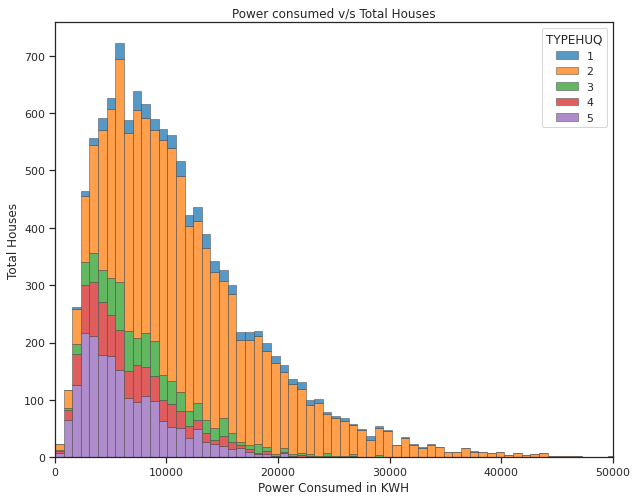

In [256]:
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="ticks")
fig = sns.histplot(
    df,
    x="KWH", hue="TYPEHUQ",
    multiple="stack",
    palette="tab10",
    edgecolor=".3",
    linewidth=.5,
    log_scale=False,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set(xlim=(0,50000))
plt.xlabel("Power Consumed in KWH")
plt.ylabel("Total Houses")
plt.title("Power consumed v/s Total Houses") # You can comment this line out if you don't need title
plt.show(fig)

Observing the plot, we notice the trend is Right skewed. Long tail in the right slope represents, more number of houses require more energy than the mean energy consumption. 
## Insight: 
- There are few mobile houses as compared to other residences.
- Majority of mobile homes are consuming more than average energy consumption across all residences.
- Few residences of Single-Family Attached (Green), Apartment in Building with 2 - 4 Units (Red) & Apartment in Building with 5+ Units (Violet) colors consume more than average energy.
- Our Dataset contains maximum housing of type 2 that is single house detached and they consume a majority of energy produced.

# Let's find some general trends for energy consumption based on the climate of the demographic location.


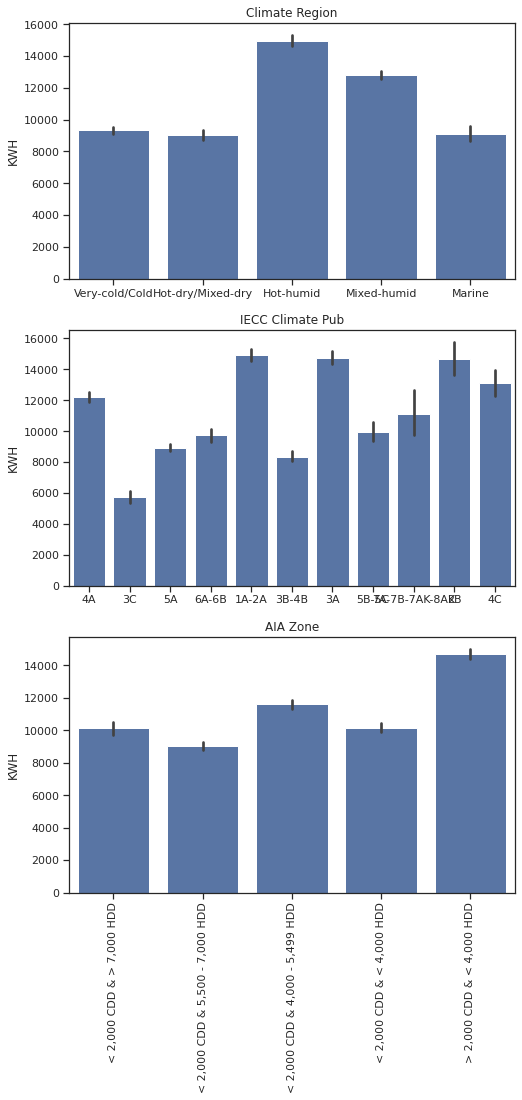

In [257]:
fig, axarr = plt.subplots(3,1,figsize=[8,16])

axarr[0].set_title('Climate Region')
axarr[1].set_title('IECC Climate Pub')
axarr[2].set_title('AIA Zone')
b1 = sns.barplot(ax=axarr[0],data=df,x='Climate_Region_Pub',y='KWH',color=sns.color_palette()[0])
b2 = sns.barplot(ax=axarr[1],data=df,x='IECC_Climate_Pub',y='KWH',color=sns.color_palette()[0])
b3 = sns.barplot(ax=axarr[2],data=df,x='AIA_Zone',y='KWH',color=sns.color_palette()[0])

b1.set_xticklabels(['Very-cold/Cold','Hot-dry/Mixed-dry','Hot-humid','Mixed-humid','Marine'],rotation=0)
b3.set_xticklabels(["< 2,000 CDD & > 7,000 HDD","< 2,000 CDD & 5,500 - 7,000 HDD","< 2,000 CDD & 4,000 - 5,499 HDD","< 2,000 CDD & < 4,000 HDD","> 2,000 CDD & < 4,000 HDD"],rotation=90)
axarr[0].set_xlabel(''); axarr[1].set_xlabel(''), axarr[2].set_xlabel('');
plt.show()

## Insight: 
Plot 1): Regions with Hot-humid and Mixed Humid climates consume more electricity. Maybe because of increased usage of Air-Conditioners or other appliances.! 

Plot 2): IECC climate zones with 1A-2A, 3A, and 7A-7B-7AK-8AK consumes the most energy, and region 3C has consumed the least energy

Plot 3) : AIA zone with CDD greater than 2000 and HDD less than 4000 requires maximum energy as compared to other zones 

# Let's check the trend of power consumption across all house types since the start of the data

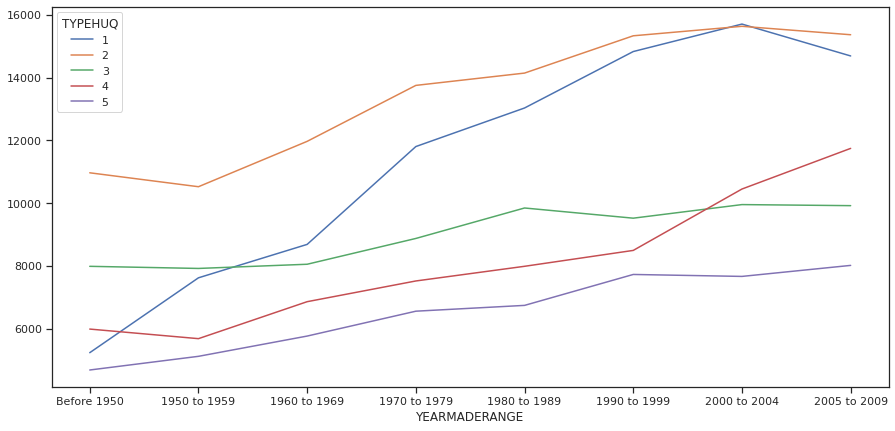

In [258]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(["YEARMADERANGE",'TYPEHUQ']).mean()['KWH'].unstack().plot(ax=ax)
ax.set_xticklabels(["","Before 1950","1950 to 1959","1960 to 1969","1970 to 1979","1980 to 1989","1990 to 1999","2000 to 2004","2005 to 2009"],rotation=0)
plt.show()


## Insight: 
- Power consumption trend for the type of house is increasing. A steep increase in power consumption for type 1 houses is witnessed from 1960 to 2004. Between 2000 - 2004, the type 1 housing exceeded the power consumption from those of type 2. Around 1999, Type 4 housing exceeded the power consumption from type 3 and the trend is increasing onwards.

### Visually inspecting dataset and associated files, there are limitless combinations of plots that can be plotted to understand the trends. In this last plot, we will look at the trends for power consumption across Urban and Rural livings

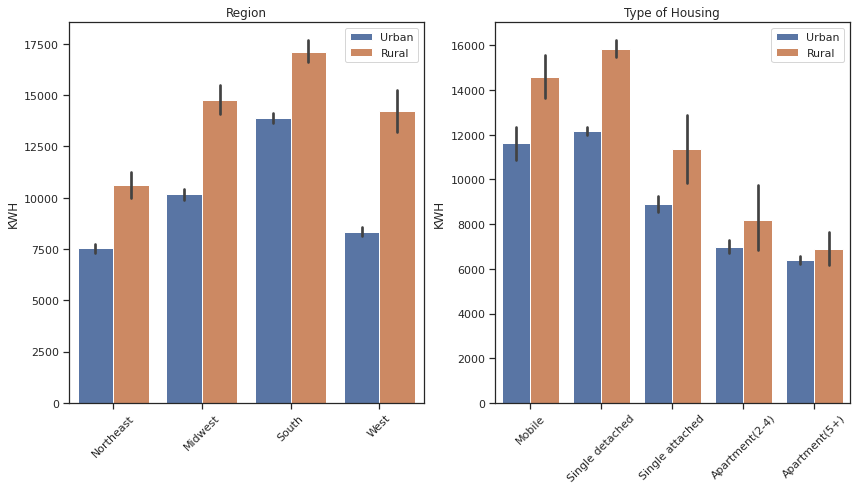

In [259]:
fig, axarr = plt.subplots(1,2,figsize=[14,7])
axarr[0].set_title('Region')
axarr[1].set_title('Type of Housing')
b1 = sns.barplot(ax=axarr[1],data=df,x='TYPEHUQ',y='KWH',hue='UR')
b2 = sns.barplot(ax=axarr[0],data=df,x='REGIONC',y='KWH',hue='UR')
b1.set_xticklabels(['Mobile','Single detached','Single attached','Apartment(2-4)','Apartment(5+)'],rotation=45)
b2.set_xticklabels(['Northeast','Midwest','South','West'],rotation=45)
handles, labels = axarr[0].get_legend_handles_labels()
axarr[0].legend(handles=handles,labels=['Urban','Rural']),axarr[1].legend(handles=handles,labels=['Urban','Rural']);
axarr[0].set_xlabel(''); axarr[1].set_xlabel('');
plt.show()

## Insight: 
- Looking at the plots we can distinctively say that rural housing schemes tend to consume more energy as compared to urban housing. This trend is maintained across all regions and all housing types.

- Apartments with 5+ rooms tend to consume almost the same KWH power either it is in rural settings or urban. Companies could build more apartments with 5+ rooms to stabilize the power demands

## Data Preprocessing

- Mandatory step in data preprocessing is checking for i) null values, ii) non-numerical values (for few models) and iii) NA values. Based on the occurance of these non-generalized values we will define a strategy to handle them.

In [261]:
# checking for null values
df.isna().sum().unique()

array([0])

In [262]:
# defining the function for checking datatype in dataset and extracting all the categorical column names
def check_dataframe_type(df):
    cols= df.columns
    num_cols = df._get_numeric_data().columns
    categorical_Columns = list(set(cols) - set(num_cols))
    print("Found {0} columns with non-numerical dataset".format(len(categorical_Columns)))
    return categorical_Columns

In [263]:
# Implementing the function defined above and checking for categorical values
categorical_columns = check_dataframe_type(df)
print(categorical_columns)

Found 5 columns with non-numerical dataset
['UR', 'METROMICRO', 'NOCRCASH', 'NKRGALNC', 'IECC_Climate_Pub']


In [264]:
# check the dataset for these columns and what values it contains
df[categorical_columns]

,UR,METROMICRO,NOCRCASH,NKRGALNC,IECC_Climate_Pub
DOEID,,,,,
1,U,METRO,-2,-2,4A
2,U,METRO,-2,-2,3C
3,U,METRO,-2,-2,5A
4,U,METRO,-2,-2,5A
5,U,METRO,-2,-2,5A
...,...,...,...,...,...
12079,U,METRO,-2,-2,6A-6B
12080,U,METRO,-2,-2,3B-4B
12081,U,METRO,-2,-2,6A-6B


Interesting Find : Columns NKRGALNC & NOCRCASH are numerical but they have been flagged as non-numerical, we will have to solve the data type problem.

But before proceeding furthur lets check what -2 means

Closely looking at public codebook provided by RECS, -2 stands for N/A values

In [265]:
layout_df[layout_df["Variable Name"]=="IECC_Climate_Pub"]

,Variable Name,Variable Label,Variable Order in File,Variable Type,Length
931,IECC_Climate_Pub,International Energy Conservation Code (IECC) ...,932,Character,15


 - We dont want to delete any values from dataset unless if it is the last option. For now we will solve this issue by using one-hot encoding them and making a sparse matrix of unique binary values. 

In [266]:
# Defining function for one-hot-encoding all non-qunatifyable columns
def one_hot_encode(df,categorical_columns):
    return pd.get_dummies(df,columns=categorical_columns,prefix=categorical_columns,drop_first=True)

In [267]:
# convert all the categorical columns into one-hot-encoded format
df = one_hot_encode(df,categorical_columns)

In [268]:
# Normalize the data between the range of 0,1 for better model training, this is not a mandatory step for some algorithms like decsiion trees and random forests
# but anyway we will do it as it does not harm
from sklearn.preprocessing import MinMaxScaler
def scale_data(X):
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(X)
    return scaled_values, scaler

## Final exploratory analysis

In [270]:
# Instead of checking the correlation between the features in the entire dataset,
# we shall try calculating the pairwise distance using TSNE and make inferences from the graph
# import TSNE  module and time module
from sklearn.manifold import TSNE
import time
time_start = time.time()

# initialize TSNE for 2 components
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.values)

# print the elapsed time log
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12083 samples in 2.751s...
[t-SNE] Computed neighbors for 12083 samples in 67.664s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12083
[t-SNE] Computed conditional probabilities for sample 2000 / 12083
[t-SNE] Computed conditional probabilities for sample 3000 / 12083
[t-SNE] Computed conditional probabilities for sample 4000 / 12083
[t-SNE] Computed conditional probabilities for sample 5000 / 12083
[t-SNE] Computed conditional probabilities for sample 6000 / 12083
[t-SNE] Computed conditional probabilities for sample 7000 / 12083
[t-SNE] Computed conditional probabilities for sample 8000 / 12083
[t-SNE] Computed conditional probabilities for sample 9000 / 12083
[t-SNE] Computed conditional probabilities for sample 10000 / 12083
[t-SNE] Computed conditional probabilities for sample 11000 / 12083
[t-SNE] Computed conditional probabilities for sample 12000 / 12083
[t-SNE] Computed conditional probabilities for s

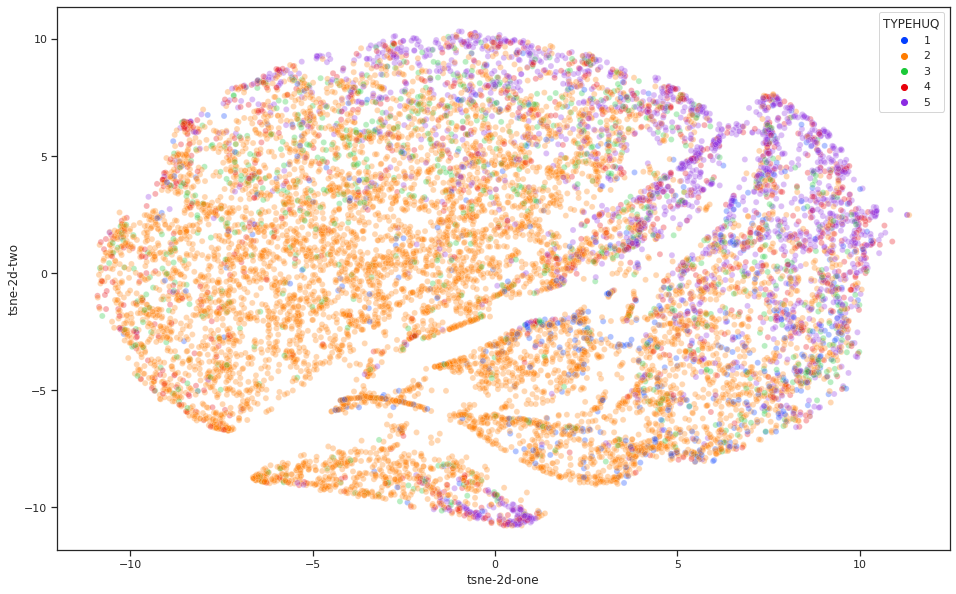

In [271]:
# Lets plot the pairwise distances of enitre dataset using the TSNE model
df_subset = df.copy()
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="TYPEHUQ",
    palette=sns.color_palette("bright", 5),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.show()

## Insight:
 - From teh pairwise plot of TSNE, 5 clusters are visible. We need more time and analysis to find those features that can clearly differentiate between these features. We wont go in detail to find those features but we will segment the clusters based on type of houses. Even "TYPEHUQ" feature seems suitable upto certain point to stratify the clusters within our dataset.

# Data Preparation

 - we will split the data into train and test sets and use KWH features as our target labels. 
 - Traing set will be used for fitting models and parameter tuning.
 - Test set will be used for testing model performance and will be kept isolated from the model during the training phase.
 

In [272]:
# Seperting data and labels into X and y 
X = df.drop(columns = ["KWH"])
y = df[["KWH"]]

In [273]:
# Scaling data and saving the scaler weights for inverse transform for later stage
X,training_scaler = scale_data(X)
y,target_scaler = scale_data(y)

# Data Modelling and Model Interpretation

 - We have powerful regression algorithms like SUpport Vector Regression and Random Forest Regression model. Best advantage of these high performance algorithms is that they by default use those features that best discretize our data.
 
 - We will use SVR regression model for now and look at the feature importances using the liner kernel from SVR.
 
 - We will be using root mean squared error for evaluating all model performances because this metric is popularly used in evaluating prediction tasks

In [274]:
# importing libraries for modelling 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Split train test data using 30% ratio for testing the model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print("Training on {0} and Predciting Model performance on {1}".format(X_train.shape[0],X_test.shape[0]))


Training on 8458 and Predciting Model performance on 3625


In [276]:
# import SVR regressor model from sklearn library
from sklearn.svm import SVR

# initialize SVR model 
svr = SVR(kernel = 'linear')

# Training regression model using default model parameters to analyse the feature impotrances
svr.fit(X_train, y_train.ravel())

# Predict values for test set
y_pred = svr.predict(X_test)

print("Root mean square error for Linear SVM is",regressor.score(X_test,y_test))

Root mean square error for Linear SVM is 0.1996254471140395


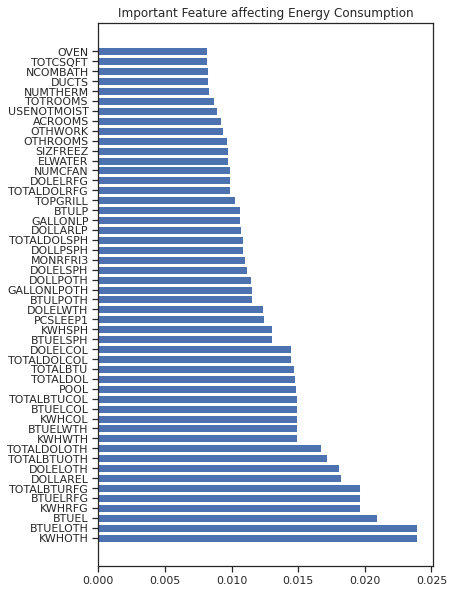

In [278]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    plt.figure(figsize = [6,10])
    plt.title("Important Feature affecting Energy Consumption")
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# passing our column names
feature_names = df.drop(columns = ["KWH"]).columns 

# calling feature importance function to plot the most important features for energy consumption
f_importances((svr.coef_[0]), feature_names, top=50)

# Interpretation : 
 - Our model finds features like KWHOTH -  Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in kilowatt-hours, 2009 and BTUELOTH - Electricity usage for other purposes (all end-uses except SPH, COL, WTH, and RFG), in thousand BTU, 2009 as most influential features affecting energy consumption. 
 
 - Several factors like presence of pool and Oven also affects the energy consumption which is a valid inference when compared to our daily lives.

# Hyperparameter Tuning
### Lets find the best parameters for our SVR model using grid search cross validation technique

In [168]:
from sklearn.model_selection import GridSearchCV 


param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
model = SVR()

grid_search = GridSearchCV(model, param_grid, refit = True, verbose = 1)
grid_search.fit(X_train,y_train.ravel())
# print best parameter after tuning 
print(grid_search.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid_search.best_estimator_) 


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-1.003, total=  12.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.849, total=  11.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   24.0s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.663, total=  11.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-0.851, total=  11.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ......... C=0.1, gamma=1, kernel=rbf, score=-1.069, total=  11.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-1.071, total=  10.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.896, total=  10.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.703, total=   9.6s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ....... C=0.1, gamma=0.1, kernel=rbf, score=-0.894, total=  10.2s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 14.0min finished


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.0001)
0.04279805398045903


In [280]:
# print best parameter after tuning 
print(grid_search.best_params_) 

# lets select the best estimators  
best_svr = grid_search.best_estimator_
# print how our model looks after hyper-parameter tuning 
print(best_svr) 

# training our data on the best model parameters
best_svr.fit(X_train,y_train.ravel())

#predict the test values 
predictions_svr = best_svr.predict(X_test) 

# rmse error score for best fit model
print("RMSE for SVM on test data is : ",best_svr.score(X_test,y_test))


{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
SVR(C=100, gamma=0.0001)
RMSE for SVM on test data is :  0.19272187591797618


In [281]:
# Lets make a dataframe for actual v/s predicted energy values
# inverse transform the scaled values using the scaler weights that we have saved from the scale_data function
y_test_inverse_scaled = target_scaler.inverse_transform(y_test)
y_pred_inversed_Scaled = target_scaler.inverse_transform(predictions_svr.reshape(-1,1))

# transforming arrays into dataframe
predictions_df_svr = pd.DataFrame({"Actual":y_test_inverse_scaled.reshape(-1),"Predicted":y_pred_inversed_Scaled.reshape(-1)})

In [282]:
# have a look into our model predictions
predictions_df_svr

,Actual,Predicted
0,11486.0,20067.257945
1,10604.0,18632.887760
2,14658.0,13768.486056
3,9555.0,14409.445442
4,15845.0,22277.777614
...,...,...
3620,3092.0,9636.621331
3621,17519.0,19347.659673
3622,6854.0,9229.582787
3623,22567.0,28898.965215


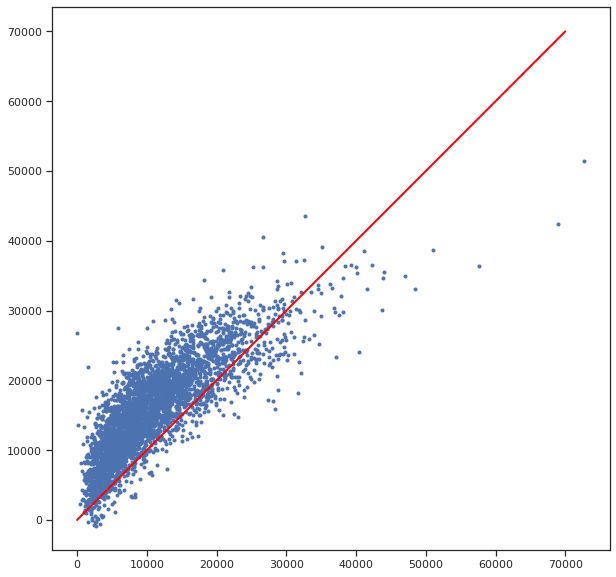

In [284]:
# lets plot a scatter plot to understand the model performance
predictions_svr = np.array(predictions_df_svr)
plt.figure(figsize = [10,10])
plt.plot(predictions_svr[:,0],predictions_svr[:,1],".")
plt.plot([0, 70000], [0, 70000], color = 'red', linewidth = 2)
plt.show()

## SVR Interpretation : 
- Our SVR model predicts more energy consumption than required and it is not desirable in industry. Such predictions can result in more energy generation if used by power generation companies, so we need to optimize our approach to achieve optimal predictions.

### Next steps: Should we try Random Forests Regression model? Yes we will.!
- The model is underfit and cannot predict accurate energy demands so we will try random forests regression model. Theoritically RF regression model is better for complex dataset like the one we are handling. Hence we will test this hypothesis practically into our scenario.

In [213]:
# import Random Forests Model
from sklearn.ensemble import RandomForestRegressor

# setting up the parameter grid for cross validation
n_features = X_train.shape[1]

params = {'max_features': np.linspace(math.sqrt(n_features),n_features,num=10,dtype='int'),
         'min_samples_leaf': range(1,20,5),
         'max_depth':range(2,7)}

# initialize the regression model with default parameters
rf = RandomForestRegressor()

# lets fit the parameters from the grid
CV = GridSearchCV(rf, params,n_jobs =-1,scoring='neg_mean_absolute_error', refit = True, verbose = 1)

# CV = GridSearchCV(rf, param_grid=params,n_jobs =-1,verbose = 1)
CV.fit(X_train,y_train.ravel())

#lets print the best parameters for our random forest 
print(CV.best_params_)


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 608 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 10.0min finished
/home/mmzaveri/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 6, 'max_features': 994, 'min_samples_leaf': 1}


In [230]:
# Lets fit our best parameter values on random forests
rf = RandomForestRegressor(max_features=CV.best_params_['max_features'],
                           min_samples_leaf=CV.best_params_['min_samples_leaf'])
rf.fit(X_train,y_train.ravel())

RandomForestRegressor(max_features=994)

In [244]:
# predict test split using the best fit model
rf_predictions = rf.predict(X_test) 
  
# Evaluating model performance for Random Forest Regressor using RMSE    
print("RMSE for RF Regressor on test data is : ",rf.score(X_test,y_test))

RMSE for RF Regressor on test data is :  0.9998916361322123


In [237]:
# Lets make a dataframe for actual v/s predicted energy values
y_pred = rf_predictions

# inverse transform the scaled values using the scaler weights that we have saved from the scale_data function
y_test_inverse_scaled = target_scaler.inverse_transform(y_test)
y_pred_inversed_Scaled = target_scaler.inverse_transform(y_pred.reshape(-1,1))

# transforming arrays into dataframe
predictions_df_rf = pd.DataFrame({"Actual":y_test_inverse_scaled.reshape(-1),"Predicted":y_pred_inversed_Scaled.reshape(-1)})

In [238]:
predictions_df_rf

,Actual,Predicted
0,15049.0,15049.24
1,10162.0,10160.43
2,17240.0,17243.25
3,3904.0,3903.46
4,8604.0,8603.27
...,...,...
3016,13020.0,13019.03
3017,13658.0,13658.98
3018,2699.0,2698.52
3019,14947.0,14947.58


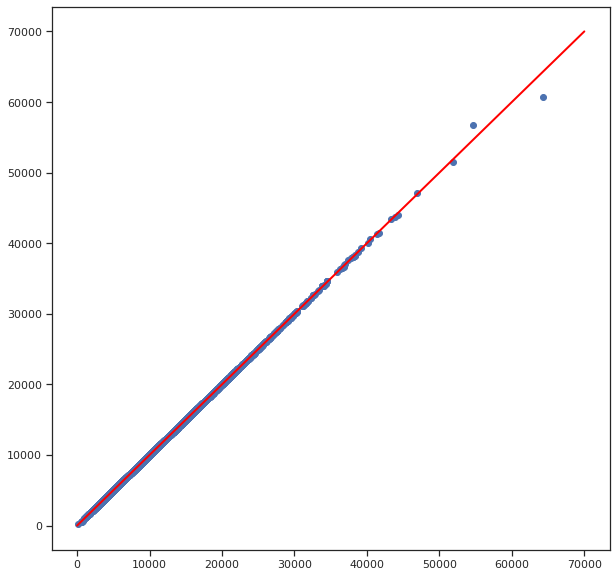

In [288]:
predictions_rf = np.array(predictions_df_rf)
plt.figure(figsize = [10,10])
plt.plot(predictions_rf[:,0],predictions_rf[:,1],"o")
plt.plot([0, 70000], [0, 70000], color = 'red', linewidth = 2)
plt.show()

# Report

The task of predicting residential energy consumption was accomplished using regression algorithms. 
These algorithms specialize in the predicting the absolute values based on our dataset.
We have implemented Support Vector Regressor and Random Forest Regressor models for predicting energy consumption.

To summarize, the exploratory analysis finds few interesting insights :
   - Rural housings consume more energy as compared to Urban housing
   - Climate plays an important role in energy consumption; hot and humid locations are bound to use more energy
   - Type 1 Residences consume most energy per unit
   - Based on pairwise distances calculated from TSNE graph, there are 5 sparse clusters present in dataset but we need more analysis to find the best features that can define those clusters. Type of residence being closer one, we differentiate the cluster using "TYPEHUQ" features; yet the clusters are not entirely differentiable.
    
Interpretation of Data Modelling and Prediction :
   - Data collection and availability is the most important task in data science and so, we try to use maximum features available.
   - As we have 940 features with >12,000 observations, the feature space is assumed to be non-linear and so we apply models like Support Vector Regression (SVR) and Random Forest Regression (RF).
   - After fine-tuning SVR the best performance that we achieved was RMS error of 0.26. Observing at the prediction values we conclude that the model predicts more energy than consumed.
   - Hence we move forward to RF model. RF model is a boosting approach to simple decision trees. This boosting approach has its own advantages like Robust to outliers, Works well with non-linear data, Lower risk of overfitting, and Runs efficiently with large datasets.
   - The best performance we achieved using RF was RMS error of 0.99. That is the most optimal performance we want. Observing prediction values we can see the difference between actual energy versus predicted energy is minimal.

##  Thank You